In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [7]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

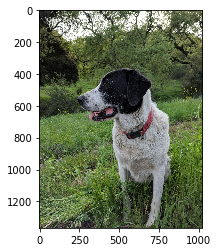

In [9]:
plt.imshow(full)

In [10]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

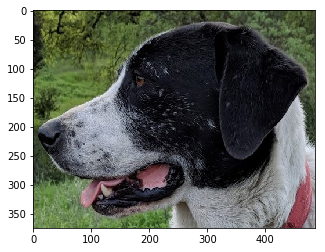

In [11]:
plt.imshow(face)

In [12]:
face.shape

(375, 486, 3)

In [13]:
full.shape

(1367, 1025, 3)

In [14]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

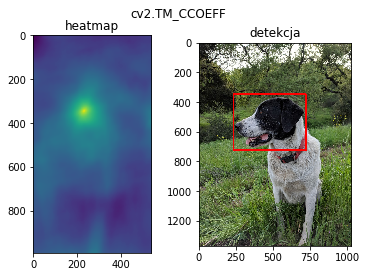

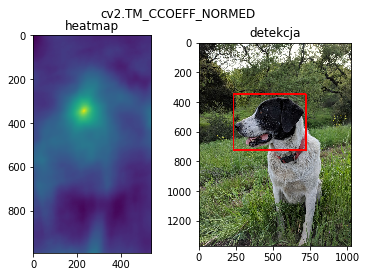

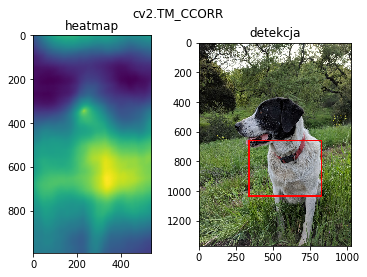

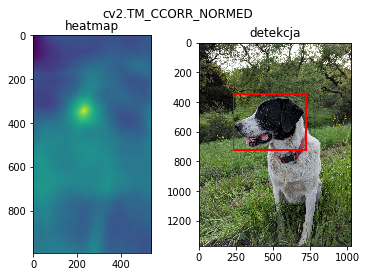

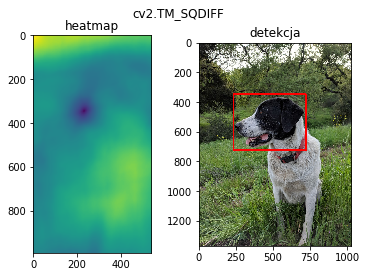

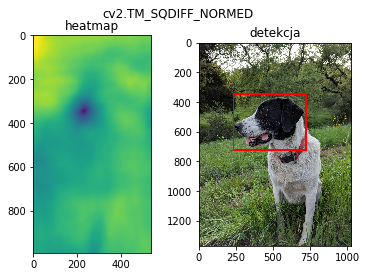

In [18]:
for m in methods:
    # kopia obrazka
    full_copy = full.copy()
    method = eval(m)
    
    # template matching
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height, width, channels = face.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # plot img
    plt.subplot(121)
    plt.imshow(res)
    plt.title("heatmap")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('detekcja')
    # tytuł od użytej metody
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')

In [16]:
res = cv2.matchTemplate(full,face,cv2.TM_CCOEFF)

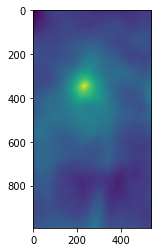

In [17]:
plt.imshow(res)